In [1]:
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')

# insert at 1, 0 is the script path (or '' in REPL)
#sys.path.insert(1, '../src/data/')
#from make_dataset import X_train, y_train, X_test, y_test, X, y

sys.path.insert(1, '../src/visualization/')
import visualize as vi

from tensorflow.keras.layers import (Dense,
                                     Dropout,
                                     Flatten,
                                     Conv2D,
                                     MaxPooling2D,
                                     Activation)
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import (ImageDataGenerator,
                                                  img_to_array)

In [2]:
ROOT_PATH = '../data/raw/'
IMG_SIZE = 50
BATCH_SIZE = 50

In [40]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=45,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='reflect',
                                   validation_split=0.3)

In [4]:
train_generator = train_datagen.flow_from_directory(directory=ROOT_PATH,
                                                    batch_size=BATCH_SIZE,
                                                    target_size=(IMG_SIZE, IMG_SIZE),
                                                    color_mode='grayscale',
                                                    class_mode='binary',
                                                    subset='training')

Found 2528 images belonging to 2 classes.


In [5]:
validation_generator = train_datagen.flow_from_directory(directory=ROOT_PATH,
                                                         batch_size=BATCH_SIZE,
                                                         target_size=(IMG_SIZE, IMG_SIZE),
                                                         color_mode='grayscale',
                                                         class_mode='binary',
                                                         subset='validation')

Found 632 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1/255.)

test_generator = test_datagen.flow_from_directory(directory=ROOT_PATH,
                                                  batch_size=BATCH_SIZE,
                                                  target_size=(IMG_SIZE, IMG_SIZE),
                                                  color_mode='grayscale',
                                                  class_mode='binary')

Found 3160 images belonging to 2 classes.


In [7]:
# 1580 with_mask images
# 1580 without_mask images
# 3160 total images

In [8]:
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 1)

In [9]:
# model = Sequential()

# model.add(Conv2D(256, (3, 3), input_shape=INPUT_SHAPE,
#                  activation='relu',
#                  kernel_regularizer=l2(0.005)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3),
#                 activation='relu',
#                 kernel_regularizer=l2(0.005)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())  # Converts 3D feature maps to 1D feature vecs
# model.add(Dense(64,
#                 activation='relu',
#                 kernel_regularizer=l2(0.005)))
                    
# model.add(Dense(1, activation='sigmoid'))


# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# model.summary()

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          1

In [11]:
#results = model.fit(train_generator,
#                    steps_per_epoch=2000 // BATCH_SIZE,
#                    epochs=2,
#                    validation_data=validation_generator,
#                    validation_steps=800 // BATCH_SIZE)
#model.save('hold-on-to-your-butts.h5')

# Only augmented data is passed into the model through the generator, never the original photo

In [41]:
results = model.fit(train_generator,
                    batch_size=BATCH_SIZE,
                    steps_per_epoch = 2528 // BATCH_SIZE,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps = 632 // BATCH_SIZE)
model.save('hold-on-to-your-butts.h5')

# Only augmented data is passed into the model through the generator, never the original photo

Epoch 1/50
50/50 [==============================] - 16s 314ms/step - loss: 0.1698 - accuracy: 0.9342 - val_loss: 0.1265 - val_accuracy: 0.9517
Epoch 2/50
50/50 [==============================] - 15s 301ms/step - loss: 0.1786 - accuracy: 0.9354 - val_loss: 0.1103 - val_accuracy: 0.9633
Epoch 3/50
50/50 [==============================] - 15s 308ms/step - loss: 0.1830 - accuracy: 0.9290 - val_loss: 0.1073 - val_accuracy: 0.9600
Epoch 4/50
50/50 [==============================] - 15s 304ms/step - loss: 0.1745 - accuracy: 0.9415 - val_loss: 0.1640 - val_accuracy: 0.9333
Epoch 5/50
50/50 [==============================] - 15s 306ms/step - loss: 0.1794 - accuracy: 0.9298 - val_loss: 0.1277 - val_accuracy: 0.9500
Epoch 6/50
50/50 [==============================] - 15s 299ms/step - loss: 0.1618 - accuracy: 0.9366 - val_loss: 0.1394 - val_accuracy: 0.9450
Epoch 7/50
50/50 [==============================] - 15s 303ms/step - loss: 0.1720 - accuracy: 0.9306 - val_loss: 0.1236 - val_accuracy: 0.9550

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
file_path = "../models/50x50-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
callbacks_list = [checkpoint]

In [43]:
model.evaluate(test_generator)

64/64 [==============================] - 14s 223ms/step - loss: 0.1442 - accuracy: 0.9693


[0.1441582590341568, 0.9693037867546082]

In [44]:
# 10 epochs: [0.41691482067108154, 0.8471518754959106]

In [45]:
# predictions = model.predict(test_generator)

In [46]:
test_generator

In [47]:
train_preds = model.predict(train_generator, batch_size=BATCH_SIZE, verbose=0)
flat_list = [item for sublist in predictions.tolist() for item in sublist]
rounded_train_preds = [int(np.round(ele)) for ele in flat_list]

In [48]:
#cm = confusion_matrix(y_true=train_generator.classes, y_pred=rounded_train_preds)
#cm

In [49]:
test_preds = model.predict(test_generator, batch_size=BATCH_SIZE, verbose=0)
flat_list = [item for sublist in predictions.tolist() for item in sublist]
rounded_test_preds = [int(np.round(ele)) for ele in flat_list]

In [50]:
predictions

array([[0.9168196 ],
       [0.07864359],
       [0.92490184],
       ...,
       [0.70535696],
       [0.11403981],
       [0.76511264]], dtype=float32)

In [51]:
test_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [52]:
cm = confusion_matrix(y_true=test_generator.classes, y_pred=rounded_predictions)
cm

array([[838, 742],
       [837, 743]])

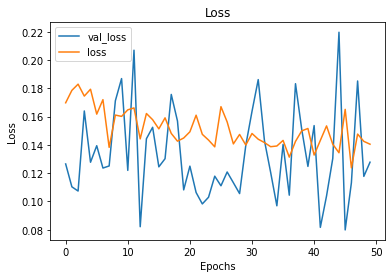

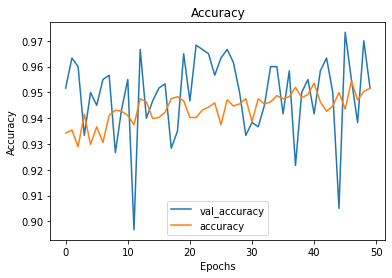

In [53]:
vi.visualize_training_results(results)

confusion matrix, without normalization


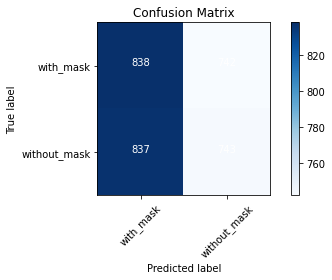

In [54]:
CATEGORIES = ['with_mask', 'without_mask']
vi.plot_confusion_matrix(cm=cm, classes=CATEGORIES, title='Confusion Matrix', normalize=False)

In [36]:
# # Import image to test

# import cv2
# from tensorflow.keras.models import load_model

# def prepare(filepath, img_size=IMG_SIZE):
#     img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
#     new_array = cv2.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    
# model = load_model("the-model.model")

# prediction = model.predict([prepare('image.jpg')])